# **GRIP @ The Sparks Foundation**

**Role : Data Science and Business Analytics Intern**

**Author : VENU SAHU**

**TASK 2 : Prediction Using Unsupervised ML**

**Objective : From the given 'iris' dataset, predict the optimum number of clusters and represent it visually**

**Algorithm used: K-means Clustering**


In [1]:
#importing all the necessary libraries
import numpy as np #For mathematical calculation
import matplotlib.pyplot as plt #for visualization
import pandas as pd #for reading DataFrames
from sklearn import datasets #loading dataset from sklearn
from sklearn.cluster import KMeans #for using inbuilt K-means algorithm
%matplotlib inline

In [2]:
iris = datasets.load_iris()


In [3]:
X = iris.data[:, :2]
y = iris.target

iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df.head(10) # See the first 10 rows

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


Text(0, 0.5, 'Sepal Width')

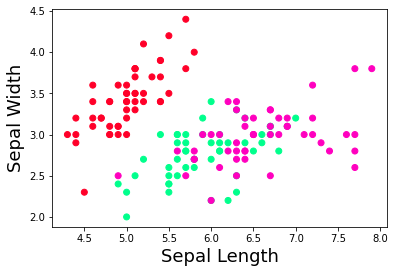

In [4]:
plt.scatter(X[:,0], X[:,1], c=y, cmap='gist_rainbow')
plt.xlabel('Sepal Length', fontsize=18)
plt.ylabel('Sepal Width', fontsize=18)

In [5]:
km = KMeans(n_clusters = 3, n_jobs = 4, random_state=21)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=4, precompute_distances='auto',
       random_state=21, tol=0.0001, verbose=0)

In [6]:
centers = km.cluster_centers_
print(centers)


[[5.77358491 2.69245283]
 [5.006      3.428     ]
 [6.81276596 3.07446809]]


Text(0.5, 1.0, 'Predicted')

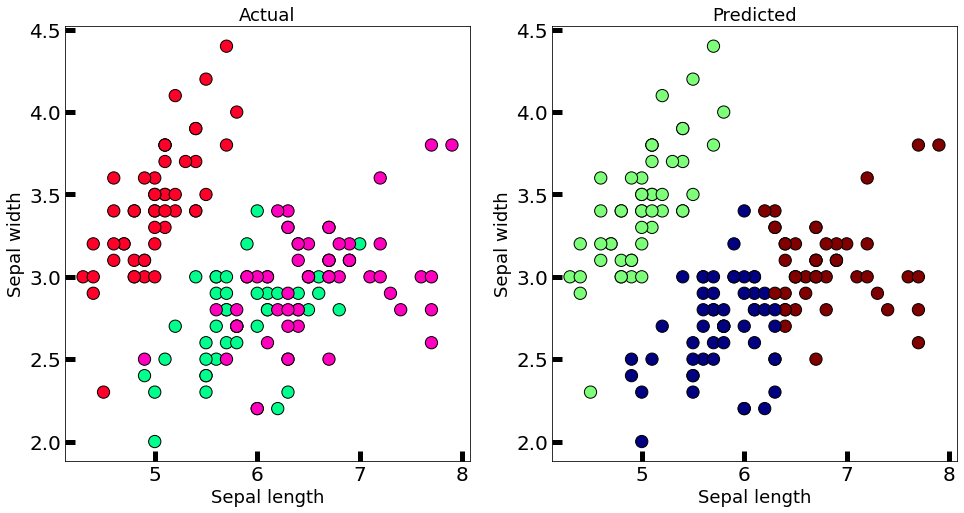

In [7]:
#This will tell us the specific cluster to which the data observations belong
new_labels = km.labels_
# Plot the identified clusters and compare with the solution
fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].scatter(X[:, 0], X[:, 1], c=y, cmap='gist_rainbow',
edgecolor='k', s=150)
axes[1].scatter(X[:, 0], X[:, 1], c=new_labels, cmap='jet',
edgecolor='k', s=150)
axes[0].set_xlabel('Sepal length', fontsize=18)  #rows
axes[0].set_ylabel('Sepal width', fontsize=18)
axes[1].set_xlabel('Sepal length', fontsize=18) #columns
axes[1].set_ylabel('Sepal width', fontsize=18)
axes[0].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[1].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('Predicted', fontsize=18)


# Elbow method


**Calculating distortions which is basically the average of the squared distances from the cluster centers of the respective clusters using Euclidean distance metric and inertias which is the sum of squared distances of samples to their closest cluster center.**

In [8]:
# Calculating distortions and inertias
from scipy.spatial.distance import cdist 
distortions = [] 
inertias = [] 

K = range(1,11) 
X = iris_df.iloc[:, [0, 1, 2, 3]].values 

for k in K: 
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k).fit(X) 
    kmeanModel.fit(X)     
    
    
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / X.shape[0]) # using Euclidean distance metric
    inertias.append(kmeanModel.inertia_)

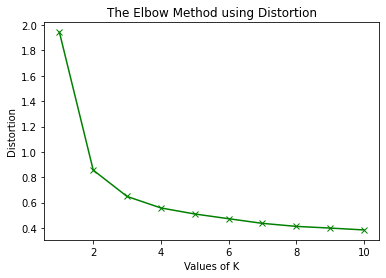

In [9]:
plt.plot(K, distortions, 'bx-', c='g') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show()

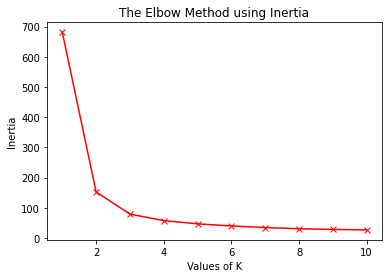

In [10]:
# Plotting Inertias VS Values of K (Elbow Method)
plt.plot(K, inertias, 'bx-', c="r") 
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.show()

**From the above elbow plots , we can clearly see that in both the plots the elbow occurs at "3" which means distortions and inertias now decrease with nominal change in every iteration.**

In [11]:

# Applying KMeans to the iris dataframe
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

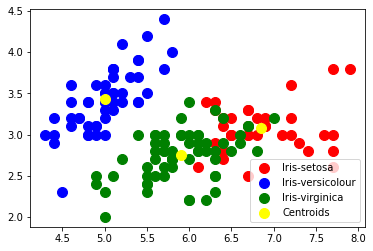

In [12]:
# Visualising the clusters - On the first two columns
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

**Testing the algorithm**

In [13]:
kmeans.labels_ #It shows particular data point belongs to which cluster

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

In [14]:
# It shows that the data with sepal length = 4.6 , sepal width = 3.4,
# petal length = 5.0 and petal width = 3.4 belongs to which cluster
sample_test=np.array([4.6,3.4,5.0,3.4])
test=sample_test.reshape(1, -1)
kmeans.predict(test)

array([2], dtype=int32)

In [15]:
#Thank you..Task Completed